In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('total_data_set - total_data_set.csv')
df

,날짜,종가,오픈,거래량,변동 %,실업자,실업률(%),청년실업자,청년실업률(%),빈도(부정),빈도(긍정),코스피지수변화,순매수비율
0,2017-05-23,3206000,3104000,21.58K,3.29%,99.5,3.6,40.8,9.2,16.90149,14.58574,0.0033,0.008202
1,2017-05-24,4175000,3206000,34.68K,30.22%,99.5,3.6,40.8,9.2,16.92568,15.11493,0.0024,0.008202
2,2017-05-25,4199000,4175000,35.91K,0.57%,99.5,3.6,40.8,9.2,16.57495,16.02447,0.0110,0.008202
3,2017-05-26,3227000,4199000,36.65K,-23.15%,99.5,3.6,40.8,9.2,14.21660,12.58475,0.0053,0.008202
4,2017-05-27,3152000,3227000,33.75K,-2.32%,99.5,3.6,40.8,9.2,10.08647,8.97965,0.0000,0.008202
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,2021-07-02,39417000,39335000,0.52K,0.21%,92.0,3.2,30.8,7.2,16.68379,15.77641,-0.0001,0.002991
1502,2021-07-03,40335000,39413000,0.19K,2.33%,92.0,3.2,30.8,7.2,13.23093,10.73259,0.0000,0.002991
1503,2021-07-04,40914000,41183000,0.55K,1.44%,92.0,3.2,30.8,7.2,11.24750,10.78220,0.0000,0.002991
1504,2021-07-05,39484000,40914000,0.70K,-3.50%,92.0,3.2,30.8,7.2,15.66184,17.03323,0.0035,0.002991


In [6]:
Real_Price=df.종가
Real_Price

0        3206000
1        4175000
2        4199000
3        3227000
4        3152000
          ...   
1501    39417000
1502    40335000
1503    40914000
1504    39484000
1505    39814000
Name: 종가, Length: 1506, dtype: int64

In [4]:
df_t = pd.read_csv('test.csv')
df_t

,��¥,����,?�픈,거래??변??%,?�업???�업�?%),�?��?�업??�?��?�업�?%),빈도(부??,빈도(긍정),코스?��??��????�매?�비??,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,2021-05-08,71709000,68669000,1.79K,4.46%,114.8,4.0,40.2,9.3,10.43115,11.16255,0.0000,0.000504
1,2021-05-09,71285000,71704000,0.91K,-0.59%,114.8,4.0,40.2,9.3,11.88244,15.03224,0.0000,0.000504
2,2021-05-10,70731000,71299000,1.90K,-0.78%,114.8,4.0,40.2,9.3,18.23789,21.26674,0.0163,0.000504
3,2021-05-11,69550000,70728000,1.13K,-1.67%,114.8,4.0,40.2,9.3,21.10419,23.78038,-0.0123,0.000504
4,2021-05-12,61088000,69552000,3.55K,-12.17%,114.8,4.0,40.2,9.3,19.41706,25.02067,-0.0149,0.000504
5,2021-05-13,62879000,61103000,1.58K,2.93%,114.8,4.0,40.2,9.3,21.86611,22.68893,-0.0125,0.000504
6,2021-05-14,61526000,62879000,1.13K,-2.15%,114.8,4.0,40.2,9.3,17.91739,19.99338,0.0100,0.000504
7,2021-05-15,58217000,61568000,1.57K,-5.38%,114.8,4.0,40.2,9.3,11.50148,12.05556,0.0000,0.000504
8,2021-05-16,57538000,58248000,2.48K,-1.17%,114.8,4.0,40.2,9.3,13.22488,15.14800,0.0000,0.000504
9,2021-05-17,54050000,57483000,1.83K,-6.06%,114.8,4.0,40.2,9.3,19.64685,22.52356,-0.0060,0.000504


In [7]:
prediction_days = 60
df_train= Real_Price
df_test= Real_Price[len(Real_Price)-prediction_days:]


findfont: Font family ['NanumGothicOTF'] not found. Falling back to DejaVu Sans.


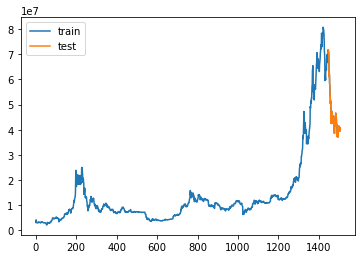

In [8]:
ax = df_train.plot()
df_test.plot(ax=ax)
plt.legend(['train', 'test'])

In [9]:
train_set = df_train.values
train_set = np.reshape(train_set, (len(train_set), 1))
train_set = train_set.astype("float32")

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
scaler = MinMaxScaler()
train_set = scaler.fit_transform(train_set)
X_train = train_set[0:len(train_set)-1]
y_train = train_set[1:len(train_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the LSTM
model = Sequential()

# Adding the input layer and the LSTM layer
model.add(LSTM(units = 12, activation = 'relu', input_shape = (None, 1)))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the LSTM
model.compile(loss = 'mean_squared_error',optimizer = 'adam',)

# Fitting the LSTM to the Training set
model.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.0588
Epoch 2/100
48/48 [==============================] - 0s 957us/step - loss: 0.0424
Epoch 3/100
48/48 [==============================] - 0s 915us/step - loss: 0.0347
Epoch 4/100
48/48 [==============================] - 0s 851us/step - loss: 0.0307
Epoch 5/100
48/48 [==============================] - 0s 851us/step - loss: 0.0283
Epoch 6/100
48/48 [==============================] - 0s 851us/step - loss: 0.0256
Epoch 7/100
48/48 [==============================] - 0s 851us/step - loss: 0.0225
Epoch 8/100
48/48 [==============================] - 0s 851us/step - loss: 0.0191
Epoch 9/100
48/48 [==============================] - 0s 851us/step - loss: 0.0155
Epoch 10/100
48/48 [==============================] - 0s 872us/step - loss: 0.0120
Epoch 11/100
48/48 [==============================] - 0s 851us/step - loss: 0.0087
Epoch 12/100
48/48 [==============================] - 0s 830us/step - loss: 0.0060
Epoch 13/100
48

Epoch 96/100
48/48 [==============================] - 0s 830us/step - loss: 1.7847e-04
Epoch 97/100
48/48 [==============================] - 0s 851us/step - loss: 1.7813e-04
Epoch 98/100
48/48 [==============================] - 0s 830us/step - loss: 1.7691e-04
Epoch 99/100
48/48 [==============================] - 0s 830us/step - loss: 1.7488e-04
Epoch 100/100
48/48 [==============================] - 0s 851us/step - loss: 1.7207e-04


In [12]:
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = scaler.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = model.predict(inputs)
predicted_BTC_price = scaler.inverse_transform(predicted_BTC_price)

ValueError: cannot insert level_0, already exists

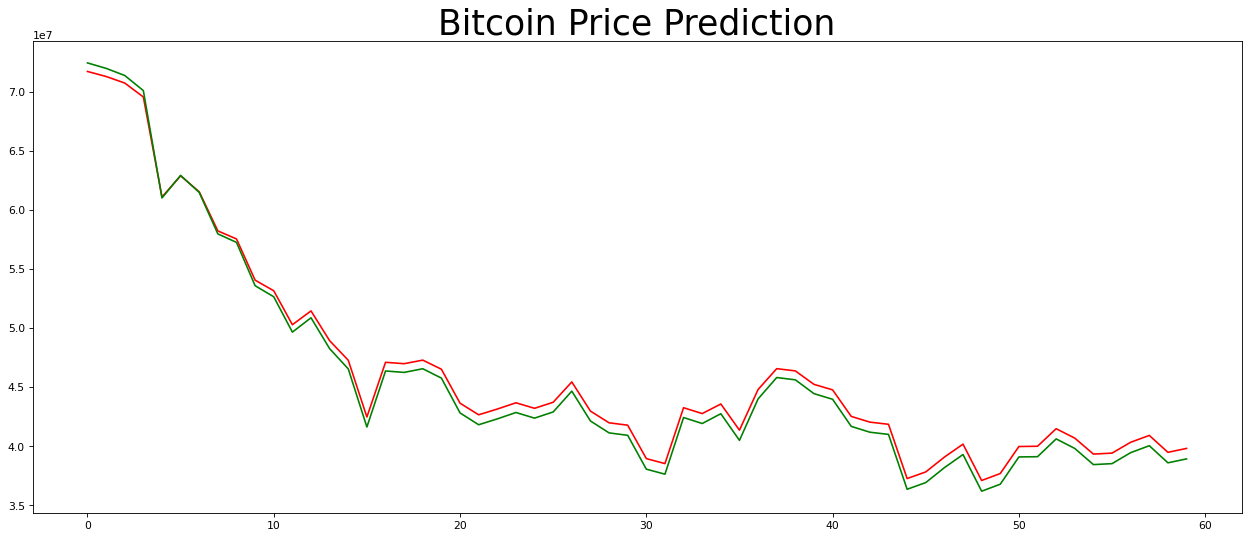

In [15]:
# Visualising the results
plt.figure(figsize=(20,8), dpi=78, edgecolor='b')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'green', label = 'Predicted BTC Price')
plt.title('Bitcoin Price Prediction', fontsize=32)
df_test = df_test.reset_index()
x=df_test.index

plt.xticks(x, labels, rotation = '60')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(12)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(12)
plt.xlabel('Time', fontsize=24)
plt.ylabel('BTC Price', fontsize=24)
plt.legend(loc=2, prop={'size': 14})
plt.show()